# **Binary Classification Evaluation Template**
 This notebook provides a reusable set of functions to evaluate binary classification models. It includes essential metrics and visualizations to help you understand model performance beyond accuracy.

 ###  **Available Functions**
* `plot_confusion_matrix(y_true, y_pred, labels)`

    visualize correct vs incorrect predictions for each class

* `plot_precision_recall_curve(y_true, y_pred_proba)`

    visualize trade-off between precision and recall

* `plot_roc_curve(y_true, y_pred_proba)`

    measures the model’s ability to distinguish between the two classes.



# Import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics

In [9]:
def plot_precision_recall_curve(y_true, y_pred_proba):
  precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
  average_precision = average_precision_score(y_true, y_pred_proba)

  plt.figure()
  plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

In [26]:
def plot_confusion_matrix(y_true, y_pred, labels):
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap=plt.cm.Blues, values_format='d')
  plt.title('Confusion Matrix')
  plt.show()

In [8]:
def plot_roc_curve(y_true, y_pred_proba):
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print("auc:", roc_auc)

  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

# Example

In [11]:
# load dataset
data = load_breast_cancer()
X = data.data
y = data.target
labels = data.target_names

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [18]:
# train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9512    0.9286    0.9398        42
           1     0.9589    0.9722    0.9655        72

    accuracy                         0.9561       114
   macro avg     0.9551    0.9504    0.9526       114
weighted avg     0.9561    0.9561    0.9560       114



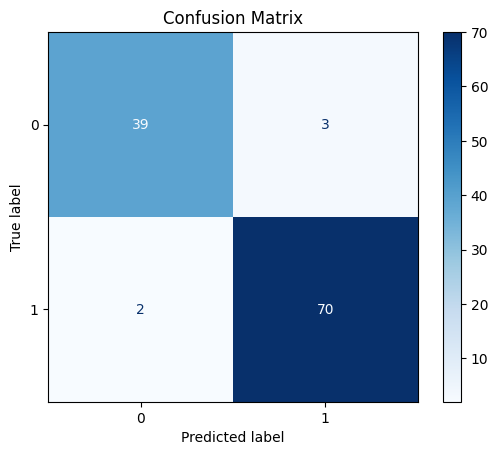

In [32]:
plot_confusion_matrix(y_test, y_pred, [0,1])

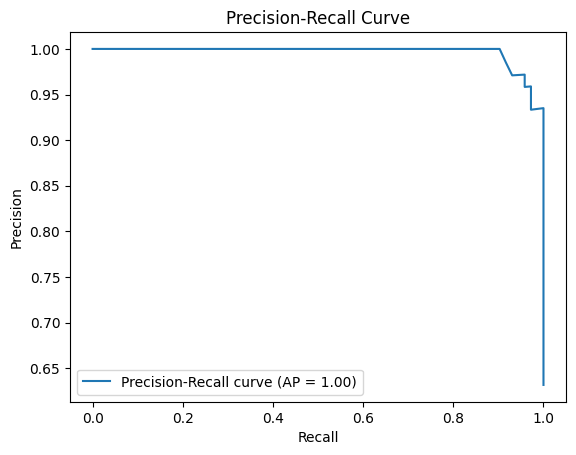

In [33]:
plot_precision_recall_curve(y_test, y_pred_proba)

auc: 0.9937169312169312


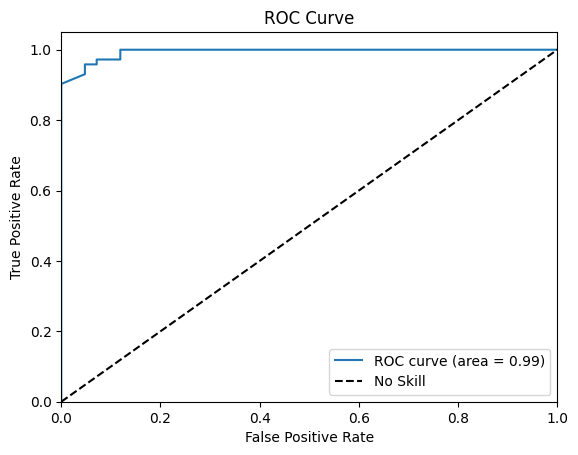

In [34]:
plot_roc_curve(y_test, y_pred_proba)